In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.cm as mcm
from cycler import cycler
import matplotlib.colors as clr
import random as rd
import json as j
%matplotlib inline

In [3]:
#data = pd.read_csv('~/Desktop/311/seperate data/monthly_by_tract.csv')
data = pd.read_csv("../data/monthly_by_tract.csv")

In [4]:
data.columns

Index(['complaint_type', 'created_date', '1000100.0', '1000201.0', '1000202.0',
       '1000500.0', '1000600.0', '1000700.0', '1000800.0', '1000900.0',
       ...
       '5027706.0', '5027900.0', '5029102.0', '5029103.0', '5029104.0',
       '5030301.0', '5030302.0', '5031901.0', '5031902.0', '5032300.0'],
      dtype='object', length=2165)

In [5]:
calls = data.melt(id_vars=['created_date', 'complaint_type'], 
                  var_name='boro_ct201', value_name='complaint_count')

In [6]:
calls.head()

created_date      complaint_type boro_ct201  complaint_count
0   2004-01-31    Dirty Conditions  1000100.0              NaN
1   2004-01-31  Water Conservation  1000100.0              NaN
2   2004-01-31                Snow  1000100.0              NaN
3   2004-01-31       Water Quality  1000100.0              NaN
4   2004-01-31          Electrical  1000100.0              NaN

In [7]:
call_table = calls.pivot_table(index="created_date", columns="complaint_type", aggfunc='sum')['complaint_count']

In [8]:
call_table.index = call_table.index.str[:3]

In [22]:
import json
with open("colordict.json") as f:
    colorDict = json.load(f)

In [37]:
sv = call_table.sum(axis=0).sort_values(ascending=False).index

In [38]:
colorList_a = [colorDict[k] for k in sv]

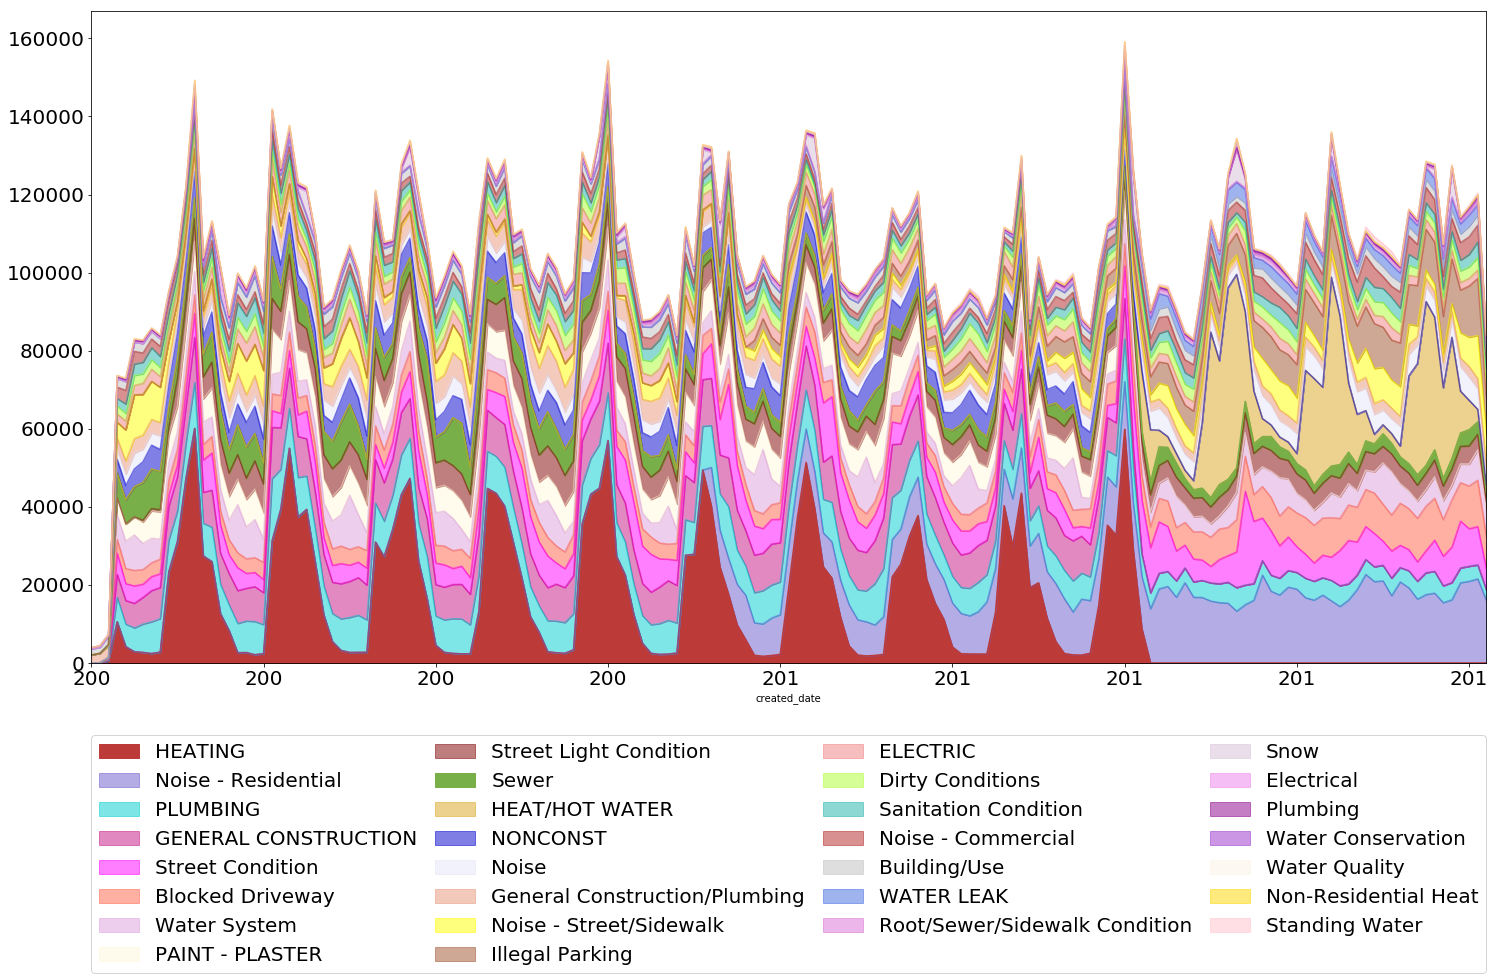

In [39]:
fig, ax = plt.subplots(figsize=(25,12))
ax.tick_params(labelsize=20)
# ax.set_yticklabels(labels=['.', '2e+4', '4e+4', '6e+4', '8e+4', '1e+5', '1.2e+5', '1.4e+5', '1.6e+5'])
call_table[sv].plot.area(color=colorList_a, ax=ax)
ax.legend(prop={'size':20}, bbox_to_anchor=(0., -.475, 1., -.1), loc=3,
           ncol=4, mode="expand", borderaxespad=0.)

In [26]:
sv = call_table.sum(axis=0).sort_values(ascending=True).index

In [35]:
colorList_a = np.array([colorDict[k] for k in sv])

In [33]:
colorList_a[:,3] -=.25

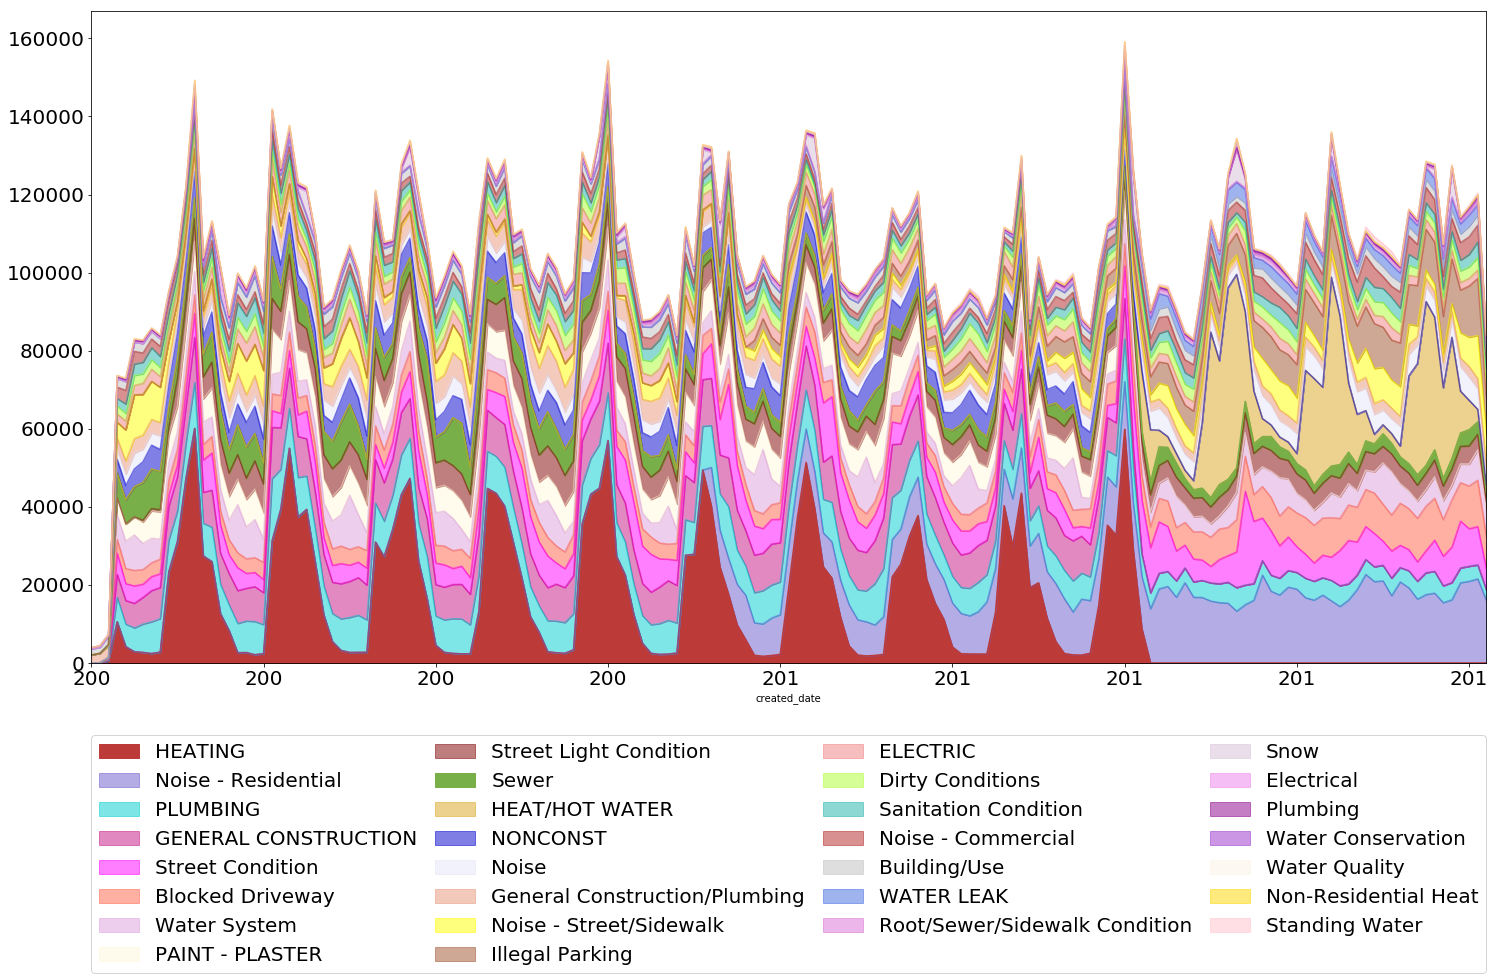

In [40]:
fig, ax = plt.subplots(figsize=(25,12))
ax.tick_params(labelsize=20)
# ax.set_yticklabels(labels=['.', '2e+4', '4e+4', '6e+4', '8e+4', '1e+5', '1.2e+5', '1.4e+5', '1.6e+5'])
call_table[sv].plot.area(color=colorList_a, ax=ax)
ax.legend(prop={'size':20}, bbox_to_anchor=(0., -.475, 1., -.1), loc=3,
           ncol=4, mode="expand", borderaxespad=0.)
fig.savefig('New Stack plot')